In [50]:
import os
import sys

from arcgis.gis import GIS
from arcgis.geometry import Point, distance
from dotenv import load_dotenv

sys.path.append('../')

from water_reach_tools import Reach

In [51]:
load_dotenv('../.env')

True

In [52]:
gis = GIS(
    url=os.getenv('ARCGIS_URL', 'https://arcgis.com'),
    username=os.getenv('ARCGIS_USERNAME', None),
    password=os.getenv('ARCGIS_PASSWORD', None)
)
gis

GIS @ https://knu2xs.maps.arcgis.com version:8.2

In [53]:
self = Reach.get_from_aw(2156)

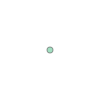

In [54]:
self.takeout.geometry

In [56]:
res = distance(4326, self.putin.geometry, self.takeout.geometry, distance_unit=9102, geodesic=False, gis=gis)
dist = res['distance']
dist

0.04819432020477069

In [58]:
self.snap_putin_and_takeout_and_trace()

True

In [147]:
from shapely.geometry import LineString, MultiLineString, shape

len_str = LineString([self.putin.geometry.centroid, self.takeout.geometry.centroid]).length
len_line = MultiLineString(list(self.geometry.coordinates())).length

len_line/len_str

62.85045686304279

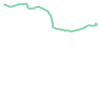

In [148]:
shape(self.geometry.__geo_interface__)

In [157]:
self.geometry.first_point.x, self.geometry.first_point.y

(-121.629968755799, 45.7640479867299)

In [151]:
self.putin.geometry.x

-121.629968756346

In [153]:
res = self.geometry.split_at_point(self.putin.geometry)

In [158]:
self.putin.geometry.snap_to_line(self.geometry).x, self.putin.geometry.snap_to_line(self.geometry).y

(-121.629968755799, 45.7640479867299)